# Identificação

- Discente: Helder Mateus dos Reis Matos
- Matrícula: 202520080003
- Disciplina: Fundamentos de Inteligência Computacional e Ciência de Dados
- Docente: Claudomiro de Souza de Sales Junior
- Tarefa: Atividade 02 - Z-score e Binomial Distribution

- Link para o Colab (modo leitura): https://colab.research.google.com/drive/1J_7_EyLEHODumvZW1rY0rMKU0FR7oQ6K?usp=sharing

# 0. Configurações

In [ ]:
!wget -O pso.py https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/pso.py

--2025-04-23 09:02:41--  https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/pso.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4961 (4.8K) [text/plain]
Saving to: ‘pso.py’

pso.py              100%[===================>]   4.84K  --.-KB/s    in 0s      

2025-04-23 09:02:41 (46.0 MB/s) - ‘pso.py’ saved [4961/4961]



In [ ]:
import itertools
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import norm
import scipy.stats as stats

from pso import Particle, Swarm, ackley, particle_swarm_optimization

# 1. Item A

*Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.*

*Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.*

## 1.1. Carregamento do dataset

O [dataset escolhido](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/) foca na avaliação da qualidade do ar ao longo de diversas regiões. Ele contém 5.000 amostras e captura fatores críticos de natureza ambiental e demográfica que influenciam nos níveis de poluição.

Atributos:

- Temperature (°C): temperatura média da região.
- Humidity (%): humidade relativa da região.
- PM2.5 Concentration (µg/m³): nível de particulato fino.
- PM10 Concentration (µg/m³): nível de particulato grosso.
- NO2 Concentration (ppb): nível de dióxido de nitrogênio.
- SO2 Concentration (ppb): nível de dióxido de sulfúrio.
- CO Concentration (ppm): nível de monóxido de carbono.
- Proximity to Industrial Areas (km): distância para a zona industrial mais próxima.
- Population Density (people/km²): número de pessoas por quilômetro quadrado na região.

Classe: Air Quality Levels

- Good: ar limpo com baixo nível de poluição.
- Moderate: qualidade de ar aceitável mas com poluentes presentes.
- Poor: poluição notável que pode causar problemas a grupos sensíveis.
- Hazardous: ar altamente poluído que traz sérios riscos de saúde à população.

In [ ]:
url_air = "https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/datasets/updated_pollution_dataset.csv"

A análise começa com o carregamento dos dados com a biblioteca Pandas.

In [ ]:
# leitura de dados com pandas
df_air = pd.read_csv(url_air)
df_air

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


Os nomes das colunas originais foram reduzidos, para simplificar a referência aos atributos.

In [ ]:
df_air.columns = ["temperature", "humidity", "pm2.5", "pm10", "no2", "so2", "co", "industry_prox", "density", "quality"]
df_air

,temperature,humidity,pm2.5,pm10,no2,so2,co,industry_prox,density,quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


## 1.2. Entendimento do dataset

A biblioteca Pandas e a sua classe DataFrame contém métodos essenciais para entender a natureza e as distribuições dos dados a serem analisados. O método `info()` mostra as informações gerais de contagem e tipos de dados. É possível observar que a maioria das colunas é de tipo numérico, com uma única coluna categórica. Além disso, nenhuma coluna possui dados nulos.

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    5000 non-null   float64
 1   humidity       5000 non-null   float64
 2   pm2.5          5000 non-null   float64
 3   pm10           5000 non-null   float64
 4   no2            5000 non-null   float64
 5   so2            5000 non-null   float64
 6   co             5000 non-null   float64
 7   industry_prox  5000 non-null   float64
 8   density        5000 non-null   int64  
 9   quality        5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


O método `describe()` mostra algumas medidas estatísticas importantes para os atributos numéricos, como média, desvio padrão, valores máximos e mínimos e quartis. Cada atributo possui uma escala diferente, com exceção da dupla de materiais reticulados (PM2.5 e PM10), que possuem médias e desvios padrão próximos.

In [ ]:
df_air.describe()

,temperature,humidity,pm2.5,pm10,no2,so2,co,industry_prox,density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


Já o método `value_counts()` conta a quantidade de amostras para cada categoria única em um determinado atributo. É possível destacar que o atributo _quality_ é o atributo-alvo (classe), tendo quatro possíveis valores: _Good_, _Moderate_, _Poor_ e _Hazardous_.

In [ ]:
# dataframe com a contagem de instâncias para cada classe única
classes_air = df_air["quality"].value_counts()
classes_air

,count
quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


O gráfico a seguir mostra a distribuição de amostras por classe, em que é possível observar um desbalanceamento, com a classe majoritária _Good_ representado 40% dos dados, enquanto que a minoritária _Hazardous_ representa apenas 10%.

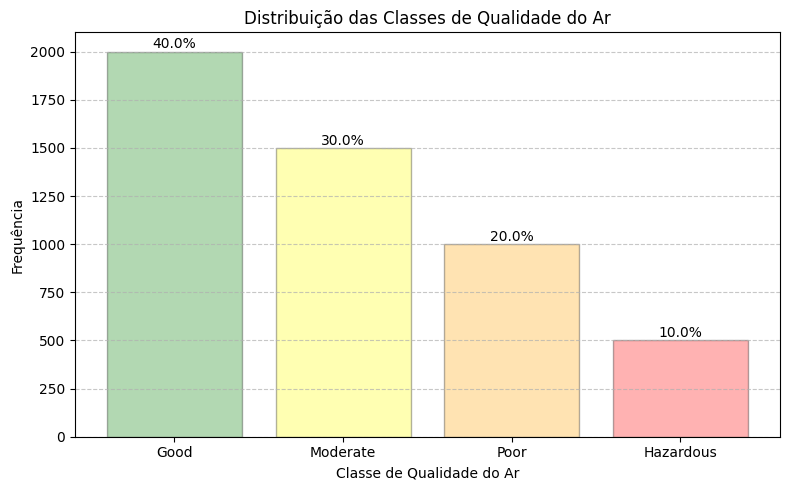

In [ ]:
class_colors = {
    "Good": "green",
    "Moderate": "yellow",
    "Poor": "orange",
    "Hazardous": "red"
}

# figura do matplotlib
plt.figure(figsize=(8, 5))

# gráfico de barras das classes x frequências
bars = plt.bar(
    classes_air.index,
    classes_air.values,
    color=[class_colors[cls] for cls in classes_air.index],
    edgecolor="black",
    alpha=0.3
)

# adicionando texto com as porcentagens em cada barra
for bar in bars:
    height = bar.get_height()
    percent = (height / df_air.shape[0]) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1, f'{percent:.1f}%',
        ha='center', va='bottom', fontsize=10
    )

# título, labels dos eixos e suas orientações e grid
plt.title("Distribuição das Classes de Qualidade do Ar")
plt.xlabel("Classe de Qualidade do Ar")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 1.3. Histogramas para classes individuais

A função a seguir, `histogram_pair()` cria um gráfico que combina os histogramas de duas classes, para um mesmo atributo, de forma que seja possível ver a sobreposição das distribuições e o impacto deste fator em uma eventual tarefa de classificação.

<ipython-input-10-d61adda4c312>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


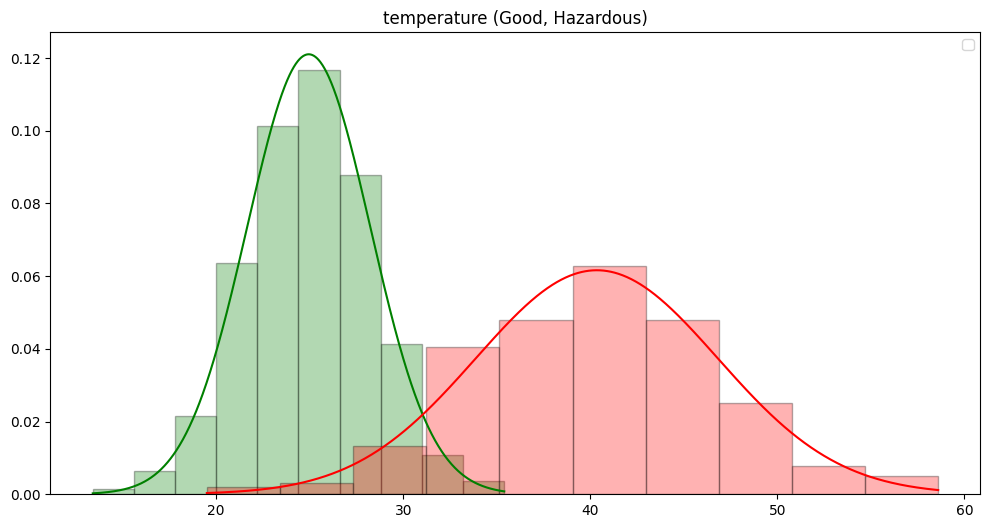

In [ ]:
def histogram_pair(
        df: pd.DataFrame,
        feature_column: str, class_column: str, c1: str, c2: str,
        class_colors: dict,
        bins: int,
        ax: plt.Axes = None, legend: bool = True
        ):
    # subplot do matplotlib
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    # filtragem dos dados para o par de classes
    df_c1 = df.loc[df[class_column] == c1]
    df_c2 = df.loc[df[class_column] == c2]

    # histograma e curva fitada da primeira classe
    s1 = df_c1[feature_column]
    mu1, sigma1 = norm.fit(s1)
    x1 = np.linspace(min(s1), max(s1), 1000)
    pdf1 = norm.pdf(x1, mu1, sigma1)
    ax.hist(
        df_c1[feature_column], bins=bins, density=True, alpha=0.3,
        color=class_colors[c1], edgecolor="black"
    )
    ax.plot(x1, pdf1, f'{class_colors[c1]}')

    # histograma e curva fitada da segunda classe
    s2 = df_c2[feature_column]
    mu2, sigma2 = norm.fit(s2)
    x2 = np.linspace(min(s2), max(s2), 1000)
    pdf2 = norm.pdf(x2, mu2, sigma2)
    ax.hist(df_c2[feature_column], bins=bins, density=True, alpha=0.3,
        color=class_colors[c2], edgecolor="black"
    )
    ax.plot(x2, pdf2, f'{class_colors[c2]}')

    # título, labels dos eixos e legenda
    ax.set_title(f"{feature_column} ({c1}, {c2})")
    ax.set_xlabel("")
    ax.set_ylabel("")
    if legend:
        ax.legend()

    return ax

histogram_pair(
    df=df_air,
    feature_column="temperature",
    class_column="quality",
    c1="Good",
    c2="Hazardous",
    class_colors=class_colors,
    bins=10
);

Para este primeiro exemplo, o atributo de temperatura possui pouca sobreposição entre as distribuições de _Good_ e _Hazardous_, o que já era esperado por essas classes serem conceituamente diferentes e até mesmo opostas. Valores mais baixos de temperatura implicam em uma qualidade do ar boa, enquanto que valores mais altos reduzem a qualidade.

## 1.4. Grid de histogramas e variação do número de bins

A fim de aprofundar a análise sobre as demais combinações de atributos e classes, a função `histogram_grid()` cria uma grid de histrogramas, onde é possível encontrar todas as análises possíveis. A primeira figura utiliza um número de bins igual a 5.

Nota-se uma sobreposição maior entre classes imediatamente sucessivas na escala de qualidade (_Good_ e _Moderate_, _Moderate_ e _Poor_, _Poor_ e _Hazardous_). Já em relação aos atributos, _temperature_, _co_ e _industry_prox_ parecem ser os mais determinantes, devido ao alto grau de separação entre as distribuições.

Outro detalhe importante é que todas as distribuições foram aproximadas com a distribuição normal, com um certo grau de acerto na representação dos dados.

Foram feitas execuções para tamanhos de bins iguais a 10, 20 e 40, onde é possível ver cada vez mais as áreas de sobreposição possuírem bins com o mesmo nível, evidenciando as amostras onde um algoritmo de aprendizado de máquina supervisionado possa ter mais dificuldade na tarefa de separação.

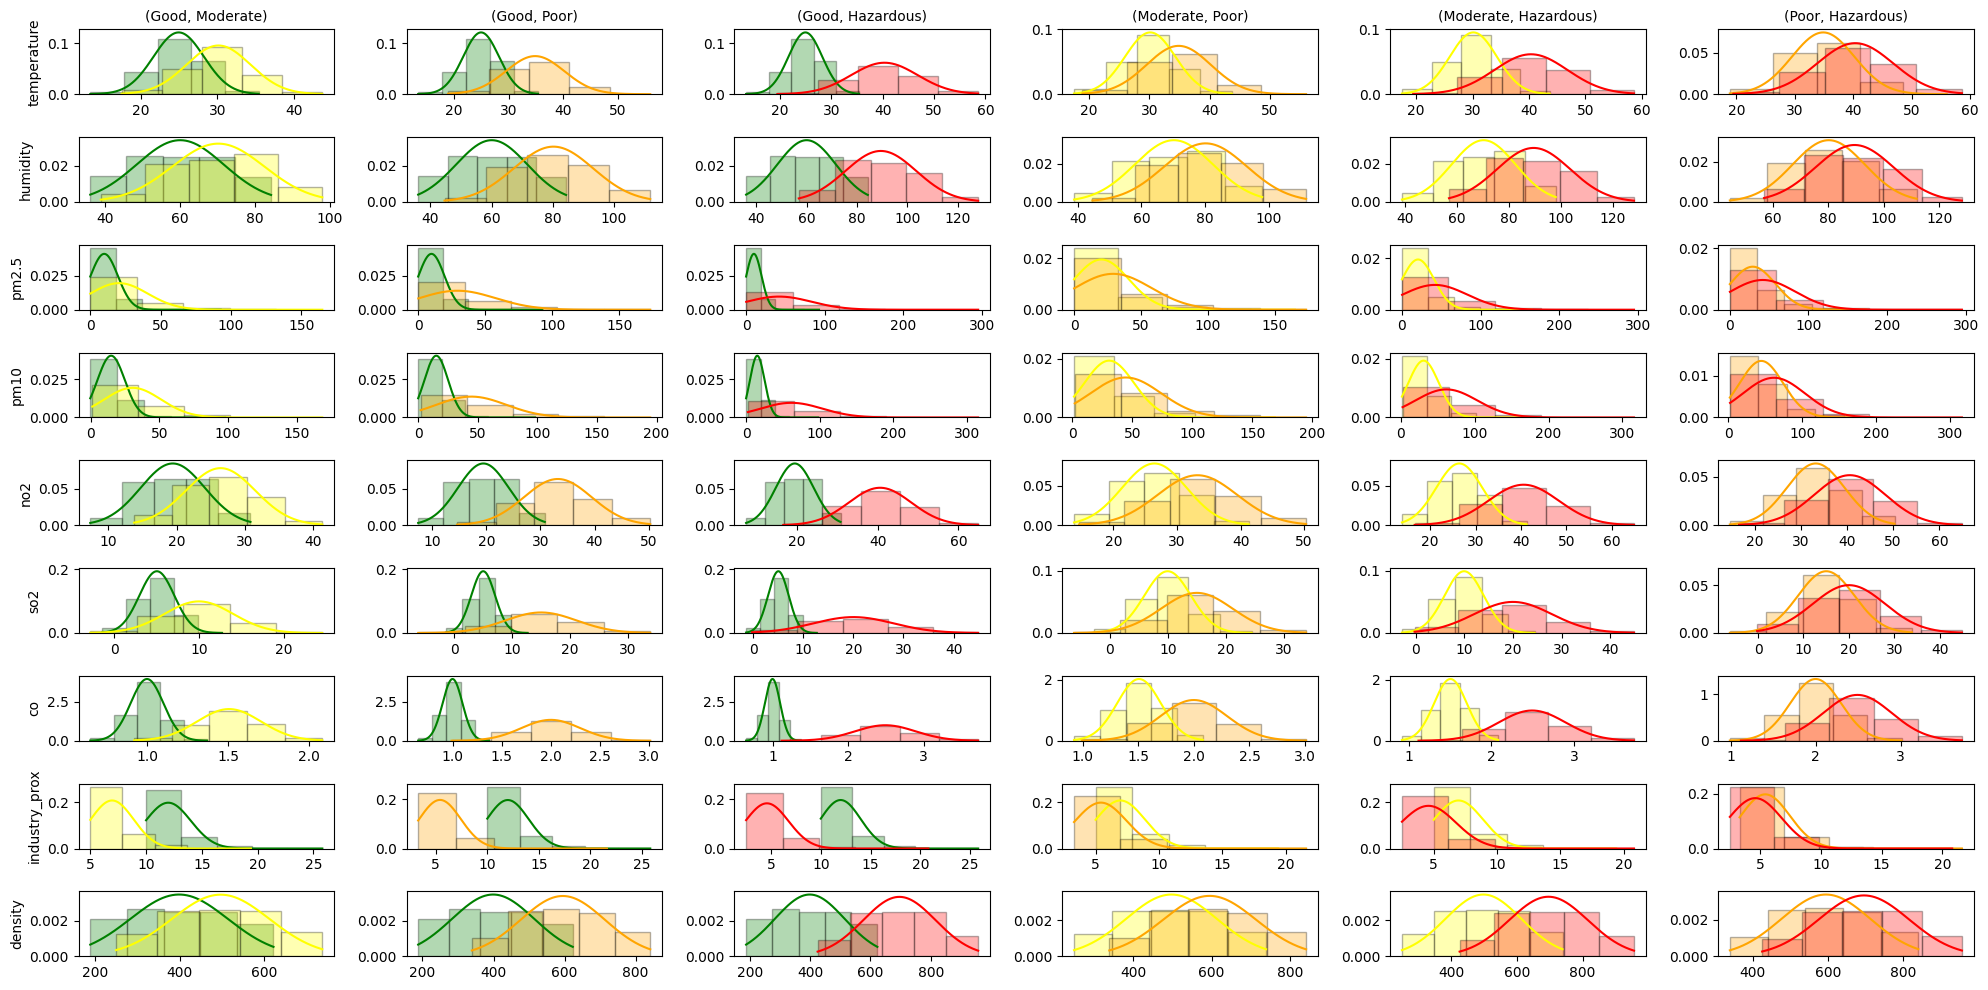

In [ ]:
def histogram_grid(
        df: pd.DataFrame,
        df_counts: pd.DataFrame,
        class_column: str,
        class_colors: dict,
        bins: int,
):

    pairs = list(itertools.combinations(df_counts.index, 2))

    nrows = len(df.columns[:-1])
    ncols = len(pairs)

    fig, axs = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(20, 10)
    )

    for i, feature_column in enumerate(df.columns[:-1]):
        for j, pair in enumerate(pairs):

            if nrows == 1 and ncols == 1:
                ax = axs
            elif nrows == 1:
                ax = axs[j]
            elif ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]

            _ = histogram_pair(
                df=df,
                feature_column=feature_column,
                class_column=class_column,
                c1=pair[0],
                c2=pair[1],
                class_colors=class_colors,
                bins=bins,
                ax=ax,
                legend=False
            );

            if i == 0:
                ax.set_title(f"({pair[0]}, {pair[1]})", fontsize=10)
            else:
                ax.set_title("")

            if j == 0:
                ax.set_ylabel(feature_column, fontsize=10)
            else:
                ax.set_ylabel("")

    plt.tight_layout()

    return fig, axs

fig, axs = histogram_grid(
    df=df_air,
    df_counts=classes_air,
    class_column="quality",
    class_colors=class_colors,
    bins=5
);

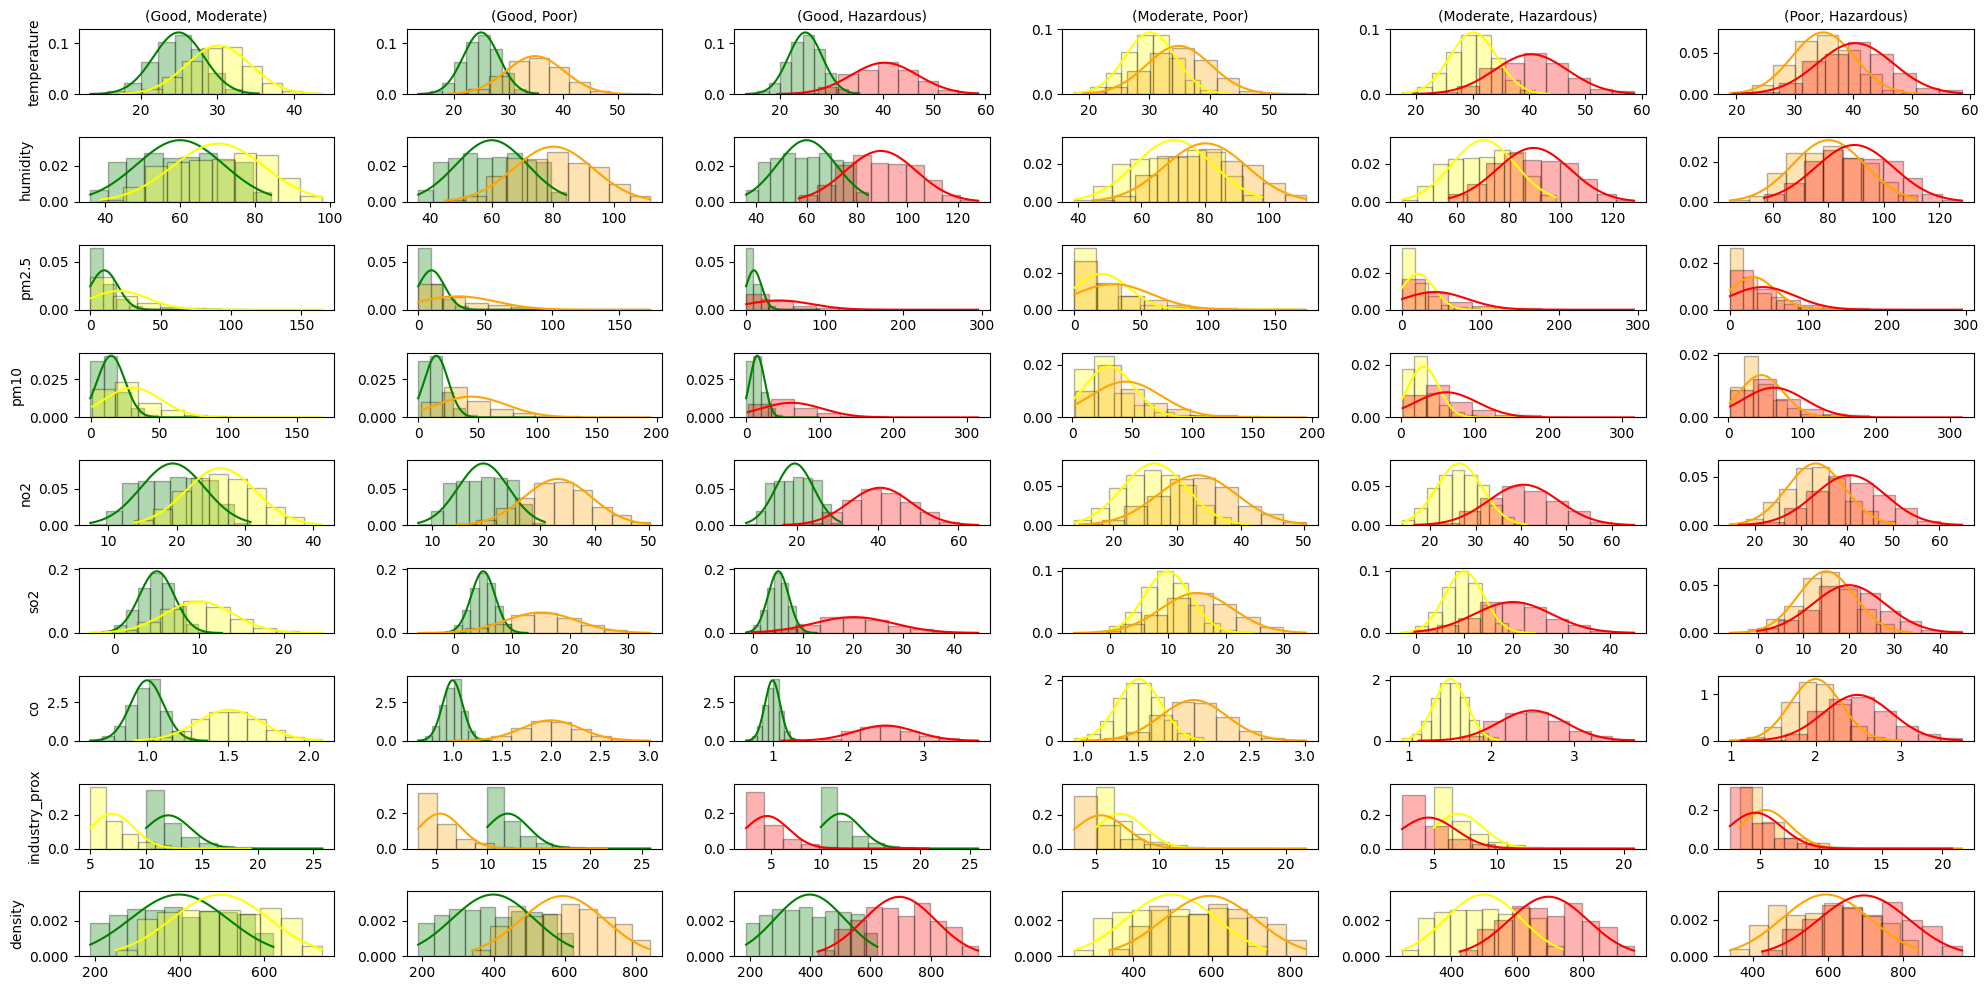

In [ ]:
fig, axs = histogram_grid(
    df=df_air,
    df_counts=classes_air,
    class_column="quality",
    class_colors=class_colors,
    bins=10
);

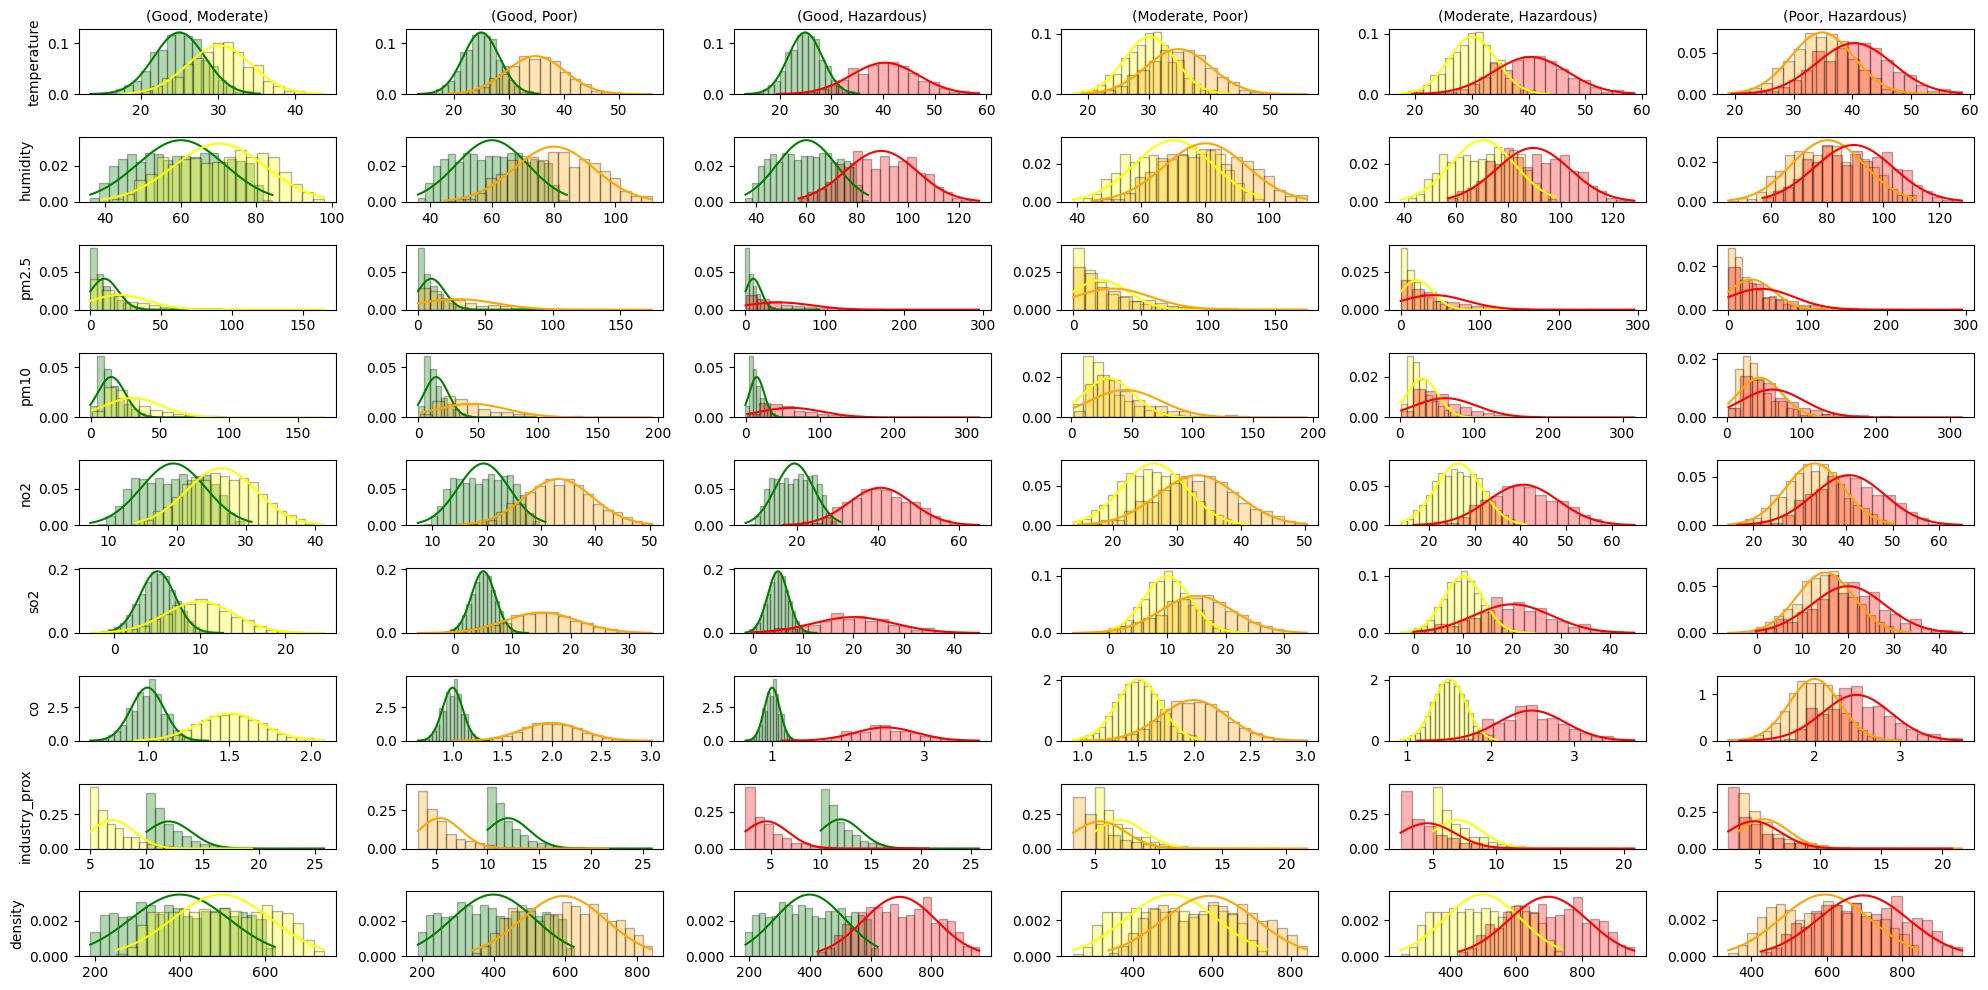

In [ ]:
fig, axs = histogram_grid(
    df=df_air,
    df_counts=classes_air,
    class_column="quality",
    class_colors=class_colors,
    bins=20
);

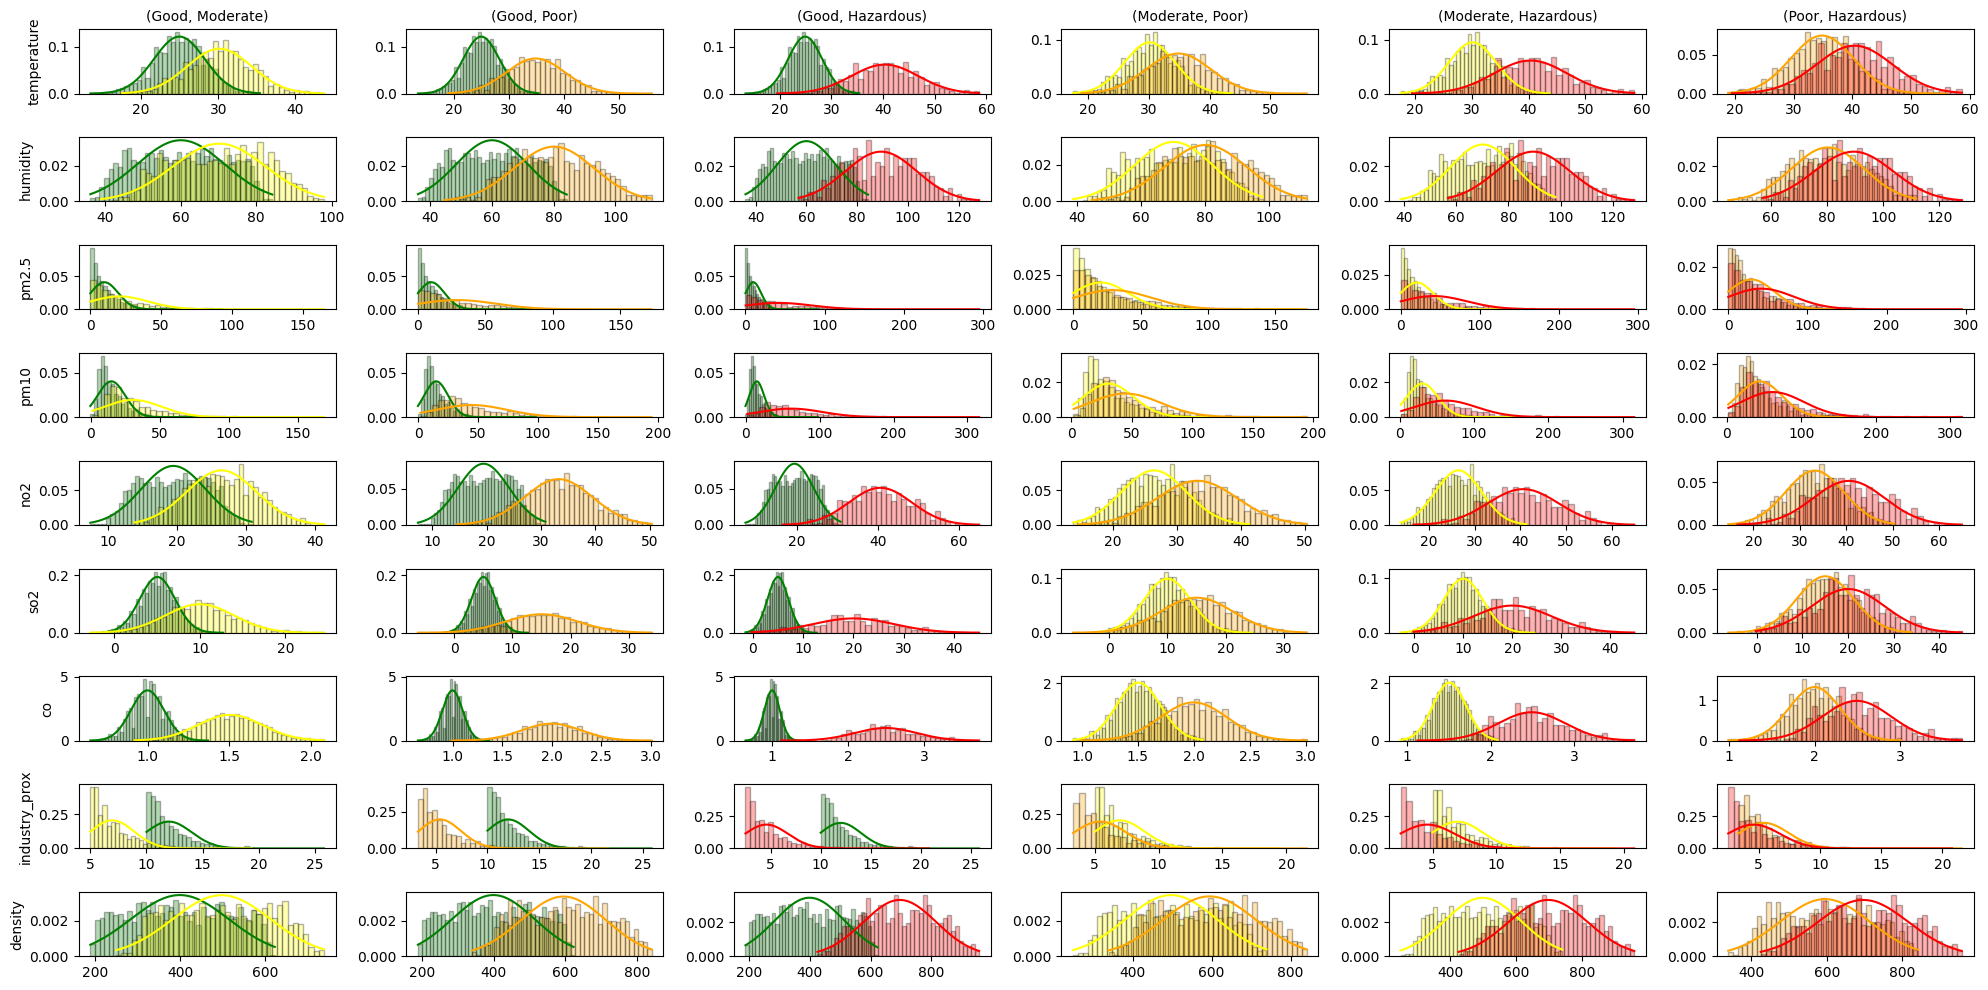

In [ ]:
fig, axs = histogram_grid(
    df=df_air,
    df_counts=classes_air,
    class_column="quality",
    class_colors=class_colors,
    bins=40
);

Dessa forma, conclui-se que as aproximações pela distribuição gaussiana são uma ferramenta poderosa no entendimento de como os valores de cada atributo podem influenciar positivamente ou negativamente durante uma tarefa de classificação, senvindo como ponto de partida para eventuais limpezas ou transformações a serem executadas antes do aprendizado.

# 2. Item B

*Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.*

*Use uma função de Python e uma tabela para obter os valores de probabilidade.*

## 2.1. Dados artificiais - execuções do algoritmo PSO

Conforme explicado na [atividade 01](https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade01/Helder_Matos-Atividade_1-futuro_trabalho_com_IA.pdf), minha pesquisa não possui um dataset específico, mas sim uma coleção de funções objetivo utilizadas para avaliar algoritmos de otimização combinatória. Dessa forma, esta seção se dedica em adaptar o contexto das metaheurísticas para criar um dataset com medições tiradas a partir de experimentos com estes mesmos algoritmos.

Será utilizado o algoritmo Particle Swarm Optimization, na sua versão base com adição do componente de inércia, [implementado em Python](https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade02/pso.py). Como não cabe ao escopo deste trabalho atual detalhar o funcionamento do algoritmo, foi descarregado um módulo durante as configurações que contém a função `particle_swarm_optimization()`, e é ela que usaremos para conduzir experimentos de busca pelo ótimo global da versão bidimensional da função Ackley (com ótimo global (0,0)), que pode ser visualizada a seguir.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Ackley_2d.png/1280px-Ackley_2d.png" alt="Imagem da Atividade 02" width="600">
</p>

O script a seguir cria um DataFrame que detalha as execuções do algoritmo sobre essa função através da melhor posição encontrada _x_ e _y_, o melhor fitness encontrado _z_, o tempo de execução da função _etime_, e um categórico _convergence_ que indica se houve ou não convergência na execução, considerando se a diferença entre o melhor fitness do enxame e o melhor local for da ordem de $10^{-3}$.

In [ ]:
n = 1000

runs = []
etime = []

for _ in range(n):
    start_time = time.time()

    run = particle_swarm_optimization(
        cost_function=ackley,
        DIMENSIONS=2, GLOBAL_BEST=0,
        B_LO=-10, B_HI=10,
        POPULATION=20, V_MAX=0.1,
        PERSONAL_C=2.0, SOCIAL_C=2.0,
        CONVERGENCE=0.001, MAX_ITER=100
    )

    end_time = time.time()

    runs.append(run)
    etime.append(end_time - start_time)

data_pso = {
    "x": [r[0][0] for r in runs],
    "y": [r[0][1] for r in runs],
    "z": [r[1] for r in runs],
    "etime": etime,
    "convergence": ["Yes" if r[2] < 100 else "No" for r in runs],
}

df_pso = pd.DataFrame(data_pso)
df_pso

,x,y,z,etime,convergence
0,-0.000100,0.000181,0.000585,0.080597,Yes
1,0.003272,-0.000138,0.009547,0.070559,No
2,-0.000008,-0.000066,0.000187,0.053993,Yes
3,0.000119,0.000285,0.000876,0.039248,Yes
4,0.000008,-0.000114,0.000323,0.057390,Yes
...,...,...,...,...,...
995,0.000133,0.000221,0.000732,0.016586,Yes
996,-0.000150,-0.000056,0.000455,0.052109,Yes
997,-0.000207,0.000153,0.000730,0.029370,Yes
998,-0.000135,0.000039,0.000398,0.046306,Yes


Ao descrever o DataFrame com `describe()`, temos indicações que _x_ e _y_ seguem uma mesma escala, enquanto que _z_ chega a um mínimo numa escala de $10^{-5}$. O tempo de execução é o que menos tem variação, dada a quantidade de interações igual a 100.

In [ ]:
df_pso.describe()

,x,y,z,etime
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.002882,0.000985,0.011938,0.059199
std,0.052103,0.030089,0.162832,0.024611
min,-0.002882,-0.002852,0.000013,0.009679
25%,-0.000209,-0.000178,0.000616,0.041045
50%,-0.000009,0.000004,0.000878,0.058422
75%,0.000208,0.000215,0.001856,0.068481
max,0.952303,0.951344,2.579961,0.160171


Ordenando o DataFrame do menor valor de _z_ para o maior, encontramos que os 5 menores valores se encontram com 5 casas decimais, o que indica um interessante estudo acerca da probabilidade de uma execução possuir essa escala ou escalas próximas.

In [ ]:
df_pso.sort_values(by="z")

,x,y,z,etime,convergence
957,-7.628802e-07,0.000005,0.000013,0.047044,Yes
24,-1.371569e-05,0.000012,0.000051,0.043689,Yes
750,1.520992e-06,0.000018,0.000052,0.117770,Yes
604,-9.853313e-07,-0.000025,0.000072,0.039562,Yes
487,-1.155837e-05,-0.000033,0.000099,0.044629,Yes
...,...,...,...,...,...
353,4.363623e-03,0.000016,0.012849,0.067361,No
831,9.521186e-01,-0.000012,2.579928,0.062297,No
558,9.523029e-01,0.000095,2.579928,0.062220,No
14,4.076187e-04,0.951344,2.579948,0.073360,No


## 2.2. Histogramas e distribuições originais

Prosseguindo para o histograma com 10 bins e a curva normal fitada, é possível observar que o atributo _x_ (e muito provavelmente o _y_ também) concentra a grande parte de seus valores muito próximo de 0, o que é confirmado pelo método `describe()`, onde vemos que 75% das amostras tem um valor menor que 0.0002. A curva fitada possui média em 0.002 com desvio padrão de 0.05.

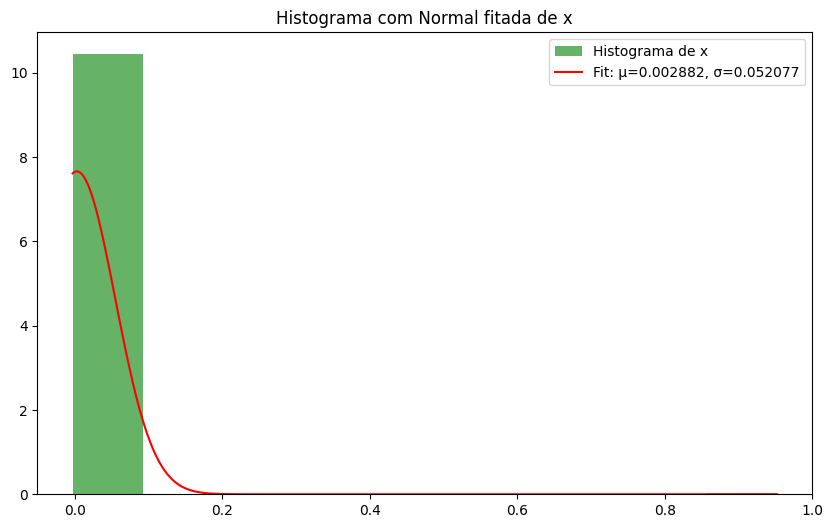

In [ ]:
def fitted_normal_histogram(df: pd.DataFrame, feature_column: str, bins: int, ax=None):
    s = df[feature_column]
    mu, sigma = norm.fit(s)
    x = np.linspace(min(s), max(s), 1000)
    pdf = norm.pdf(x, mu, sigma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.hist(df[feature_column], bins=10, density=True, alpha=0.6, color='g', label=f"Histograma de {feature_column}")

    ax.plot(x, pdf, 'r-', label=f"Fit: μ={mu:.6f}, σ={sigma:.6f}")

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"Histograma com Normal fitada de {feature_column}")
    ax.legend()
    return ax

fitted_normal_histogram(df=df_pso, feature_column="x", bins=10);

Para os demais atributos, o _y_ aparece com o mesma concentração próximo ao ótimo global, conforme confirmamos com o _x_. Já o _z_ possui uma média em 0.01, com um desvio padrão bem maior em relação aos demais, com 0.16. Por fim, o _etime_ possui um sino mais distribuído que os demais, ao longo de todos os 10 bins.

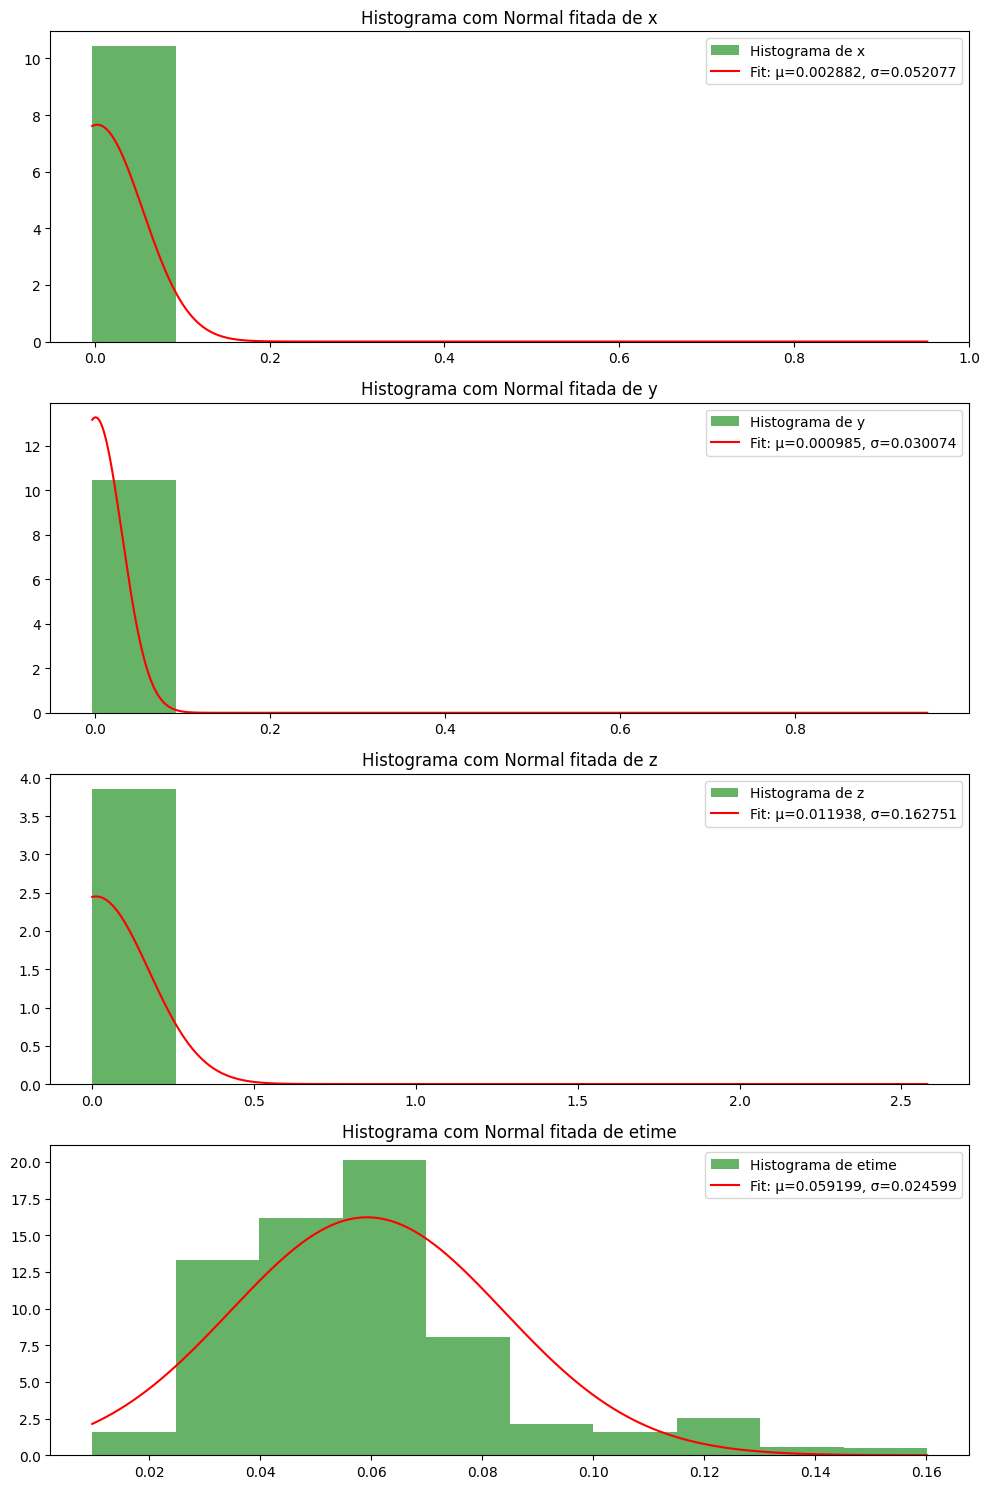

In [ ]:
def fitted_normal_histogram_grid(df: pd.DataFrame, bins: int):
    nrows = len(df.columns[:-1])
    ncols = 1

    fig, axs = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(10, 15)
    )

    for i, feature_column in enumerate(df.columns[:-1]):
        ax = axs[i]

        _ = fitted_normal_histogram(df=df, feature_column=feature_column, bins=bins, ax=ax);

    fig.tight_layout()

    return fig, axs

fig, axs = fitted_normal_histogram_grid(df=df_pso, bins=10);

## 2.3. Estudo do Z-score e standardization

De forma a facilitar o cálculos dos z-scores, o DataFrame `df_normal` possui as médias e desvios padrão fitados pela distribuição normal.

In [ ]:
normal_data = {
    "mu": [],
    "sigma": []
}

for column in df_pso.columns[:-1]:
    mu, sigma = norm.fit(df_pso[column])
    normal_data["mu"].append(mu)
    normal_data["sigma"].append(sigma)

df_normal = pd.DataFrame(normal_data, index=df_pso.columns[:-1])
df_normal

,mu,sigma
x,0.002882,0.052077
y,0.000985,0.030074
z,0.011938,0.162751
etime,0.059199,0.024599


A função `zscore` realiza o cálculo de $z = \frac{x-\mu}{\sigma}$.

In [ ]:
def zscore(x, mu, sigma):
    return (x - mu) / sigma

Assim, é criado um novo DataFrame a partir da cópia do original, que acaba recebendo os valores de zscores do processo de standardization.

In [ ]:
df_pso_zscore = df_pso.copy()

for column in df_pso.columns[:-1]:
    df_pso_zscore[column] = zscore(
        x=df_pso[column],
        mu=df_normal.loc[column, "mu"],
        sigma=df_normal.loc[column, "sigma"]
    )

df_pso_zscore

,x,y,z,etime,convergence
0,-0.057244,-0.026742,-0.069759,0.869882,Yes
1,0.007491,-0.037341,-0.014688,0.461815,No
2,-0.055490,-0.034933,-0.072200,-0.211658,Yes
3,-0.053046,-0.023276,-0.067969,-0.811092,Yes
4,-0.055176,-0.036538,-0.071364,-0.073542,Yes
...,...,...,...,...,...
995,-0.052769,-0.025398,-0.068852,-1.732350,Yes
996,-0.058221,-0.034624,-0.070555,-0.288218,Yes
997,-0.059309,-0.027668,-0.068868,-1.212636,Yes
998,-0.057925,-0.031468,-0.070908,-0.524140,Yes


O gráfico mantém as mesmas configurações de barras e curva, porém com as médias em 0 e os desvios padrão igual a 1.

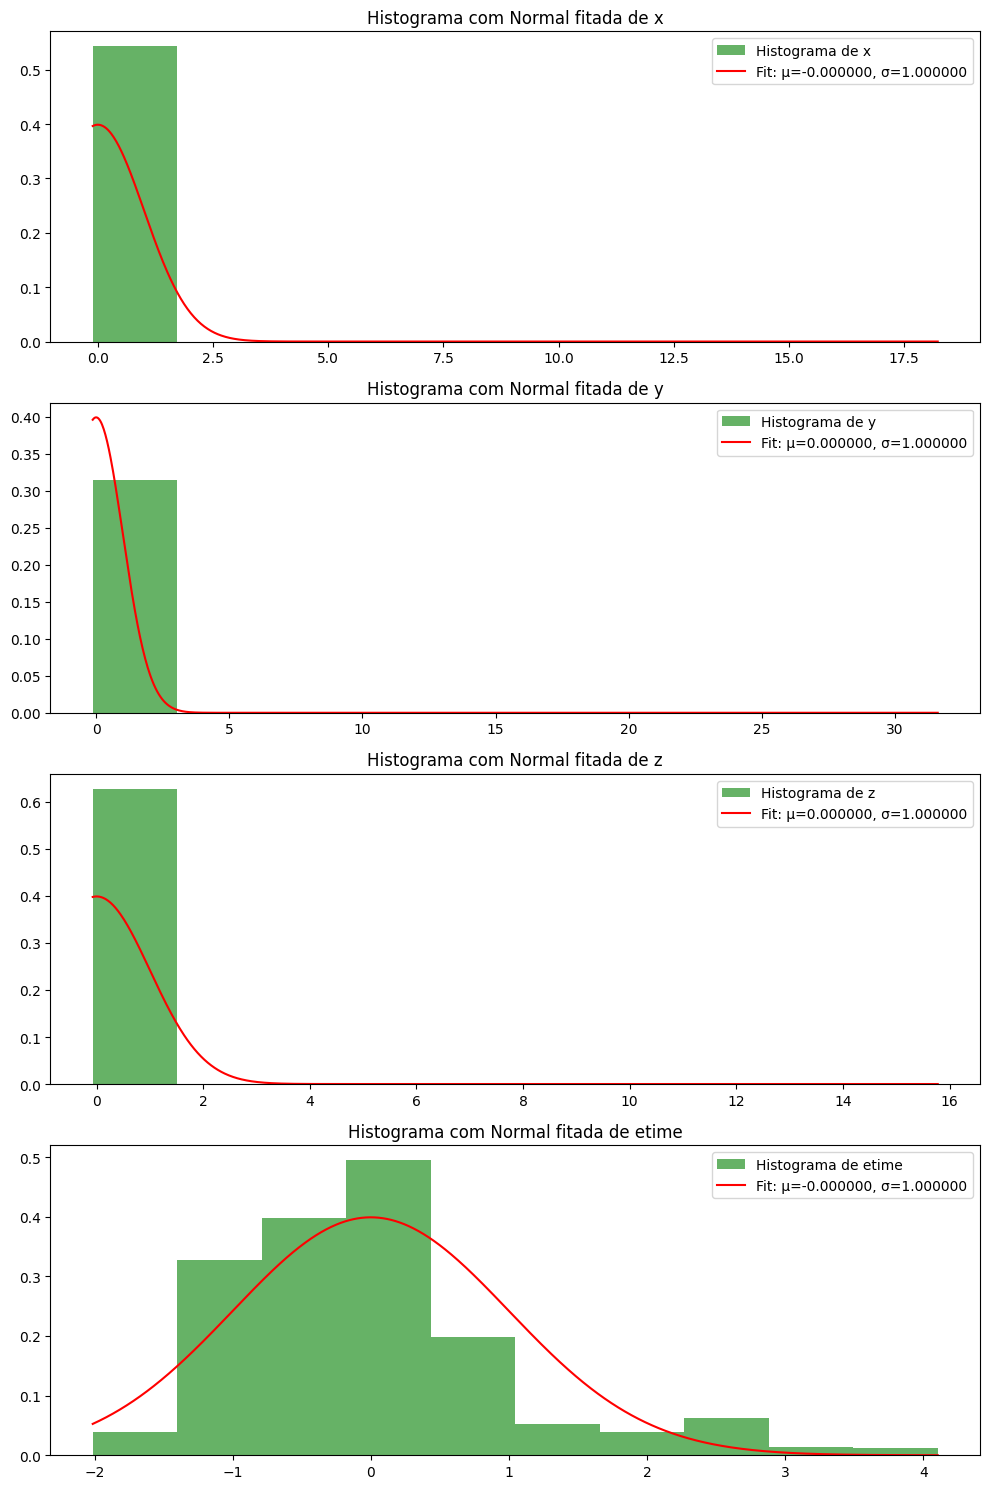

In [ ]:
fig, axs = fitted_normal_histogram_grid(df=df_pso_zscore, bins=10);

## 2.4. Uso da tabela de probabilidades

Conforme idealizado, estamos buscando qual a probabilidade de uma execução chegar na ordem de $10^{-5}$? Começamos calculando o z-score para este valor.

In [ ]:
x = 1e-5

z = zscore(x, mu=df_normal["mu"]["z"], sigma=df_normal["sigma"]["z"])
z

np.float64(-0.07328972696930432)

O script a seguir gera um DataFrame com os valores das probabilidades calculadas para as diversas escalas entre 0 e 4, tanto para sinal positivo, quanto para sinal negativo.

In [ ]:
row_headers = np.arange(0, 4.1, 0.1)
col_headers = np.arange(0, 0.1, 0.01)

x1, x2 = np.meshgrid(col_headers, row_headers)

zscore_grid = x1 + x2

zscore_grid_cdf = stats.norm.cdf(zscore_grid)

df_zscore_table_pos = pd.DataFrame(zscore_grid_cdf, index=row_headers, columns=col_headers)
df_zscore_table_pos.columns = [str(round(x, 2)) for x in df_zscore_table_pos.columns]
df_zscore_table_pos.index = [str(round(x, 1)) for x in df_zscore_table_pos.index]
df_zscore_table_pos

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.500000,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.555670,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.579260,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.606420,0.610261,0.614092
0.3,0.617911,0.621720,0.625516,0.629300,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.708840,0.712260,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.770350,0.773373,0.776373,0.779350,0.782305,0.785236
0.8,0.788145,0.791030,0.793892,0.796731,0.799546,0.802337,0.805105,0.807850,0.810570,0.813267
0.9,0.815940,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913


In [ ]:
row_headers = np.arange(-4, 0.01, 0.1).round(2)
col_headers = np.arange(0, -0.1, -0.01)

x1, x2 = np.meshgrid(col_headers, row_headers)

zscore_grid = x1 + x2

zscore_grid_cdf = stats.norm.cdf(zscore_grid)

df_zscore_table_neg = pd.DataFrame(zscore_grid_cdf, index=row_headers, columns=col_headers)
df_zscore_table_neg.columns = [str(round(x, 2)) for x in df_zscore_table_neg.columns]
df_zscore_table_neg.index = [str(round(x, 1)) for x in df_zscore_table_neg.index]
df_zscore_table_neg

,0.0,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.08,-0.09
-4.0,0.000032,0.000030,0.000029,0.000028,0.000027,0.000026,0.000025,0.000024,0.000023,0.000022
-3.9,0.000048,0.000046,0.000044,0.000042,0.000041,0.000039,0.000037,0.000036,0.000034,0.000033
-3.8,0.000072,0.000069,0.000067,0.000064,0.000062,0.000059,0.000057,0.000054,0.000052,0.000050
-3.7,0.000108,0.000104,0.000100,0.000096,0.000092,0.000088,0.000085,0.000082,0.000078,0.000075
-3.6,0.000159,0.000153,0.000147,0.000142,0.000136,0.000131,0.000126,0.000121,0.000117,0.000112
-3.5,0.000233,0.000224,0.000216,0.000208,0.000200,0.000193,0.000185,0.000178,0.000172,0.000165
-3.4,0.000337,0.000325,0.000313,0.000302,0.000291,0.000280,0.000270,0.000260,0.000251,0.000242
-3.3,0.000483,0.000466,0.000450,0.000434,0.000419,0.000404,0.000390,0.000376,0.000362,0.000349
-3.2,0.000687,0.000664,0.000641,0.000619,0.000598,0.000577,0.000557,0.000538,0.000519,0.000501
-3.1,0.000968,0.000935,0.000904,0.000874,0.000845,0.000816,0.000789,0.000762,0.000736,0.000711


De posse da tabela, encontramos que a probabilidade de uma execução qualquer ter um fitness da ordem de 5 casas decimais é de cerca de 47.2%.

In [ ]:
df_zscore_table_neg["-0.07"]["0.0"]

np.float64(0.47209682981947887)

# 3. Item C

<p align="center">
  <img src="https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/imagens/c1.png" alt="Imagem da Atividade 02" width="600">
</p>

$$P_{x} = {n \choose k} p^{x} q^{n-x}$$

- $P$ = probabilidade binomial
- $x$ = número de vezes para um resultado específico dentro de $n$ tentativas
- ${n \choose k}$ = número de combinações
- $p$ = probabilidade de sucesso em uma única tentativa
- $q$ = probabilidade de falha em uma única tentativa
- $n$ - número de tentativas

Para $s = 0.80$, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

## 3.1. Cálculo via equação da probabilidade binomial

Para calcular a binomial, é definida a seguinte função para o fatorial.

In [ ]:
def fatorial(x):
    if x == 0:
        return 1
    else:
        return x * fatorial(x - 1)

De posse da `fatorial()` encontramos a probabilidade de, dentre 50 experimentos, 48 derem positivos, considerando uma taxa de sucesso de 0.8.

In [ ]:
def binomial_probability(n, k, p):
    choose = fatorial(n) / (fatorial(k) * fatorial(n - k))
    return choose * (p ** k) * ((1 - p) ** (n - k))

binomial_probability(n=50, k=48, p=0.8)

0.001092736514728003

## 3.2. Simulações das probabilidades

Considerando a taxa de sucesso $s$ e o número de tentativas $n$.

In [ ]:
s = 0.8
n = 50

A função `roll_experiment()` gera uma amostra de 50 experimentos, que serão positivos caso um número aleatório de uma distribuição uniforme seja maior que $s$.

In [ ]:
def roll_experiment(s, n):
    x = np.random.uniform(size=n)
    sample = [True if x_i < s else False for x_i in x]
    return sample

sum(roll_experiment(s, n))

42

Dessa forma, podemos gerar um número grande de experimentos, 500 mil neste caso! Através do método `describe()`, descobrimos uma média de 40 eventos positivos com desvio padrão de 2.8.

In [ ]:
distribution = [sum(roll_experiment(s, n)) for _ in range(500000)]
pd.Series(distribution).describe()

,0
count,500000.000000
mean,40.005794
std,2.824846
min,24.000000
25%,38.000000
50%,40.000000
75%,42.000000
max,50.000000


Para ilustrar a progressão dos experimentos modelados pela distribuição binomial, seguem figuras para as 10 próximas execuções, seguidos de saltos cada vez maiores em direção à execução 500 mil.

Nas primeiras 10, as contagens variam bastante, mas que já começam a se empilhar em bins iguais a 37 e 38. Entre as execuções 10 e 100 há uma convergência para que a média alcance cerca de 14% da frequência relativa, o que só se confirma nas interações seguintes.

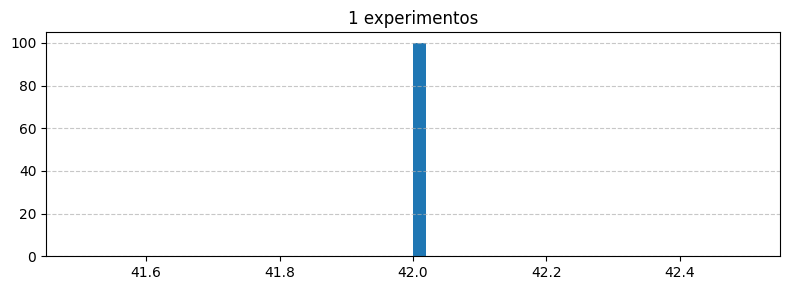

In [ ]:
def histogram_experiment(distribution, n):
    fig, axs = plt.subplots(figsize=(8, 3))

    axs.hist(distribution[:n], bins=50, weights=np.ones(n) * 100 / n)

    axs.grid(axis='y', linestyle='--', alpha=0.7)

    axs.set_title(f"{n} experimentos")

    fig.tight_layout()

    fig.show()

histogram_experiment(distribution, 1)

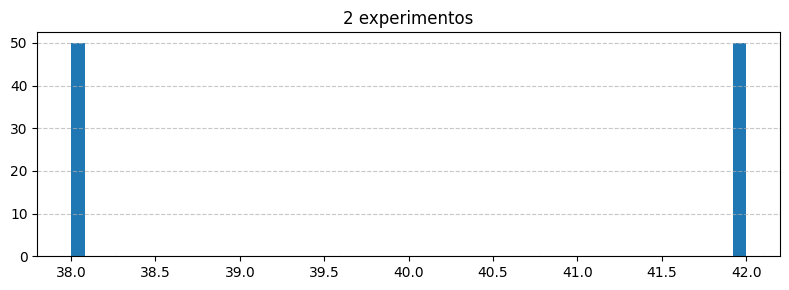

In [ ]:
histogram_experiment(distribution, 2)

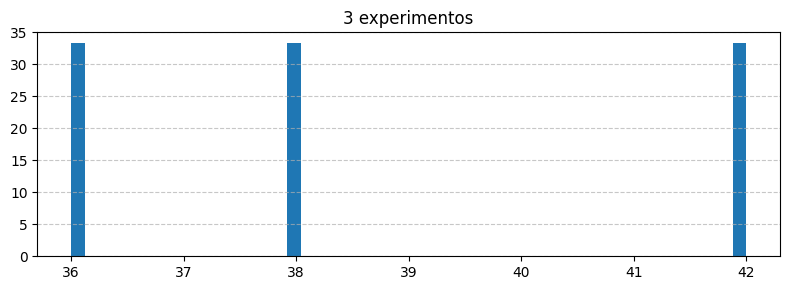

In [ ]:
histogram_experiment(distribution, 3)

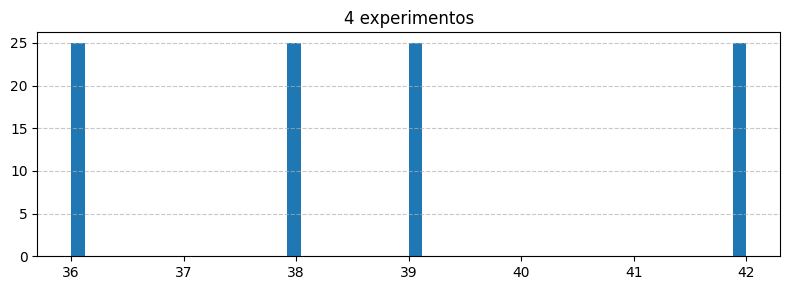

In [ ]:
histogram_experiment(distribution, 4)

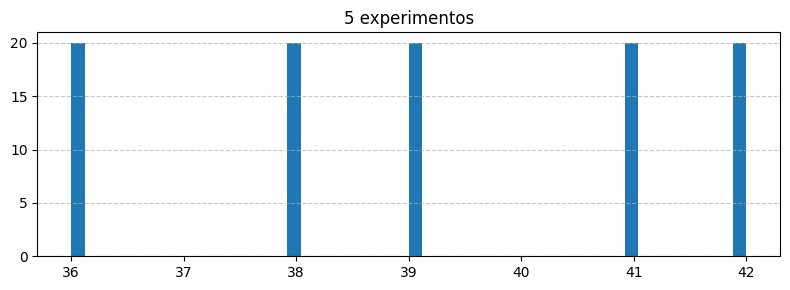

In [ ]:
histogram_experiment(distribution, 5)

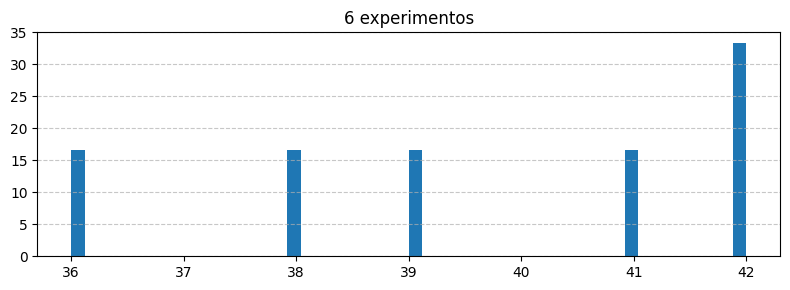

In [ ]:
histogram_experiment(distribution, 6)

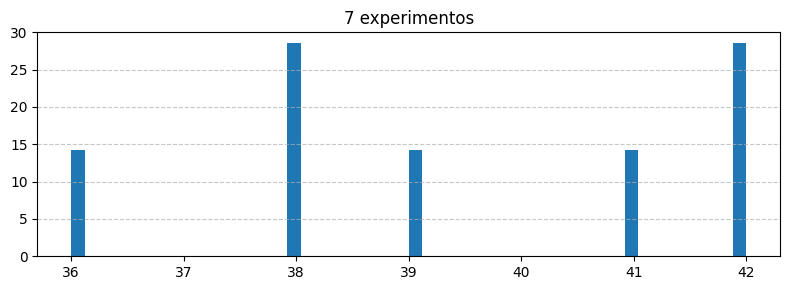

In [ ]:
histogram_experiment(distribution, 7)

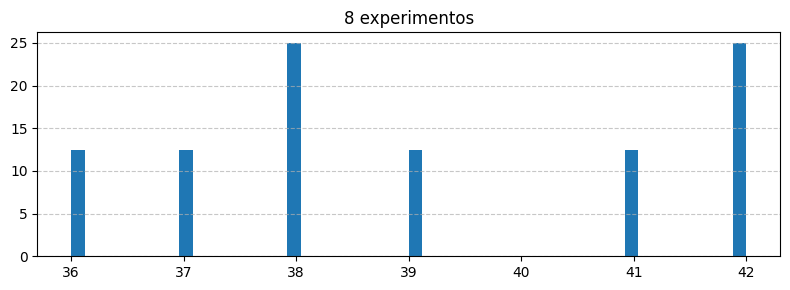

In [ ]:
histogram_experiment(distribution, 8)

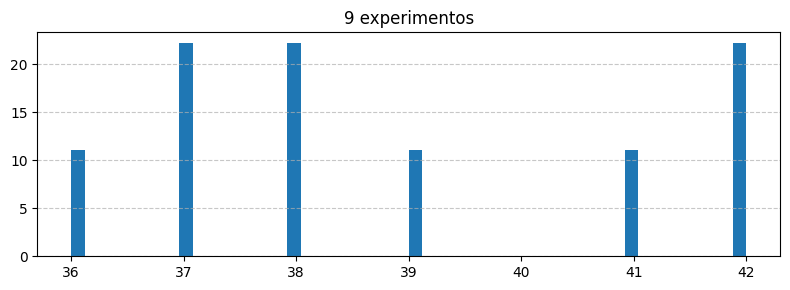

In [ ]:
histogram_experiment(distribution, 9)

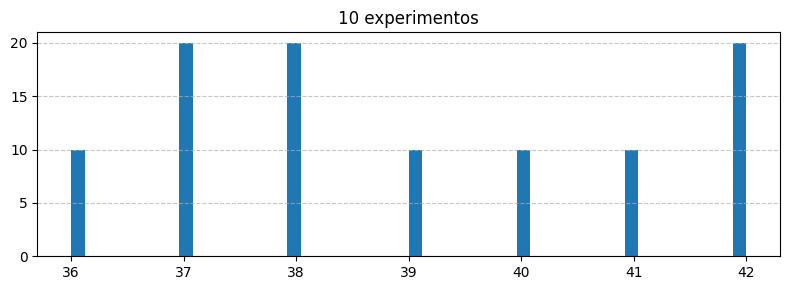

In [ ]:
histogram_experiment(distribution, 10)

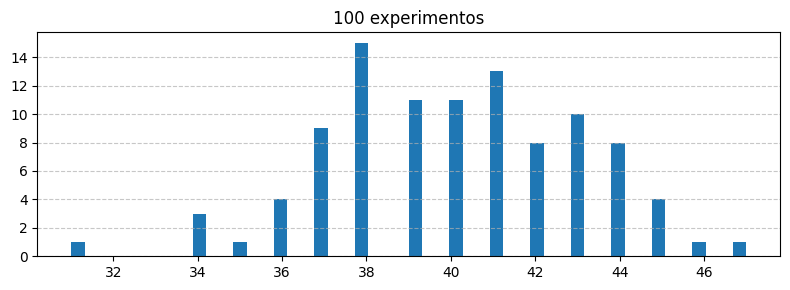

In [ ]:
histogram_experiment(distribution, 100)

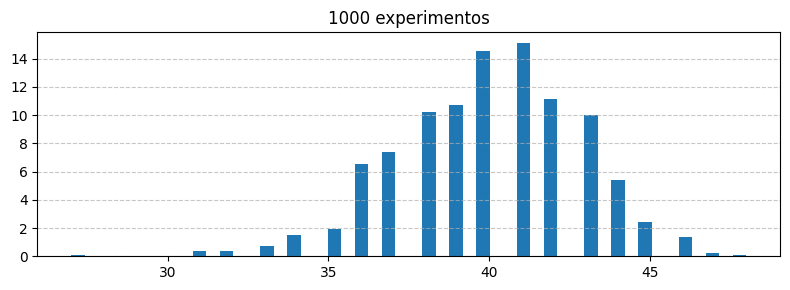

In [ ]:
histogram_experiment(distribution, 1000)

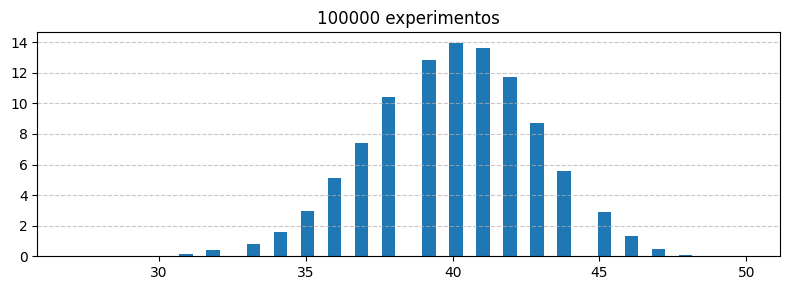

In [ ]:
histogram_experiment(distribution, 100000)

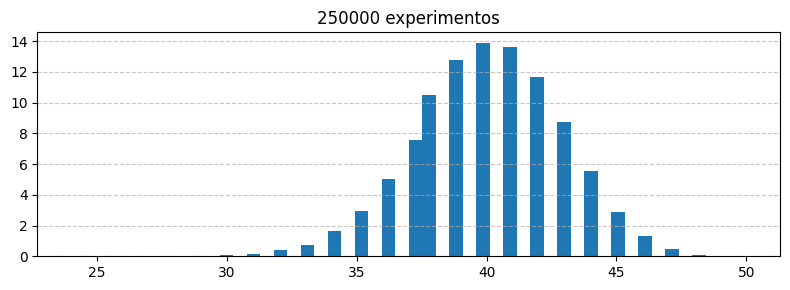

In [ ]:
histogram_experiment(distribution, 250000)

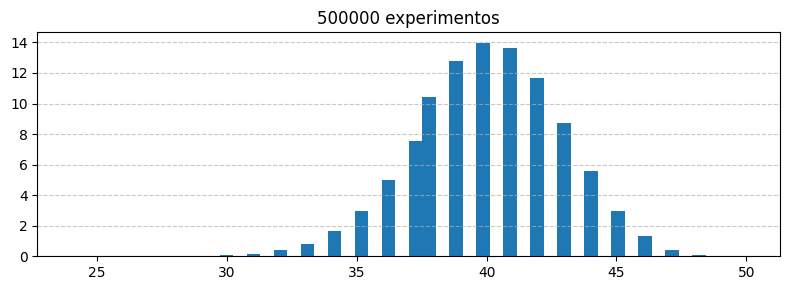

In [ ]:
histogram_experiment(distribution, 500000)